In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/61.csv')

In [6]:
data.head()

,S9bcbf828_bd0c_4a71_8021_7a262de8978c,S23ea1a02_938c_47cc_8a7d_abd33db1f305,Sddfe7bdf_0d22_4f98_b712_09df67794990,Sb80aec3c_742c_4e9d_b45b_53809b6b80f1,S988b3794_2640_4ff6_a739_d473adbca3e8,S5d095a36_74db_44ec_bca2_35af7a47f1c5,S97e6b861_062c_4235_8f12_db621f22e353,S9120d8d8_8605_493d_a963_7642852778c4,S10aa11ee_6df1_42f6_bc32_6ffed2e7d25c,S3e1fc047_a69e_469b_a005_33b208fdbfd3,...,AFX_GPL16043_B_3,AFX_GPL16043_B_4,AFX_GPL16043_C_1,AFX_GPL16043_C_2,AFX_GPL16043_C_3,AFX_GPL16043_C_4,AFX_GPL16043_D_1,AFX_GPL16043_D_2,AFX_GPL16043_D_3,AFX_GPL16043_D_4
A2M,1089.512804,817.391023,840.879197,1673.077699,1367.349035,935.871686,1098.531072,1006.157536,1150.354633,757.702210,...,1036.960456,1017.082045,1827.474623,1824.532337,1821.585046,1903.076377,1468.727240,1473.039832,1502.956286,1427.924199
AACS,76.359635,65.666852,69.349554,75.846066,73.861128,64.387478,62.648624,65.472602,76.221557,81.370538,...,27.986918,27.034147,22.394943,20.920104,20.836593,22.550615,24.288130,24.485137,23.533417,23.638545
AAK1,23.645639,24.642537,19.999533,19.738299,20.370230,18.339510,18.883359,20.719004,19.467302,25.016942,...,193.185889,183.405107,85.938303,77.849767,75.814990,80.135029,139.119548,143.169421,149.814462,158.440651
AAMP,99.351243,82.982464,85.113450,101.004205,143.612424,81.511204,81.734588,80.855726,111.542665,171.116366,...,73.826187,72.615813,67.205851,68.460226,64.475910,70.980552,66.864982,69.763216,69.884871,72.033250
AANAT,15.001960,12.080957,9.440853,10.079374,11.749709,6.752929,6.072582,11.148317,9.588649,18.980570,...,4.529463,4.334080,3.894510,4.141305,3.733108,4.104556,4.153681,4.049139,4.253279,3.914179


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,1089.512804,817.391023,840.879197,1673.077699,1367.349035,935.871686,1098.531072,1006.157536,1150.354633,757.702210,...,1036.960456,1017.082045,1827.474623,1824.532337,1821.585046,1903.076377,1468.727240,1473.039832,1502.956286,1427.924199
AACS,76.359635,65.666852,69.349554,75.846066,73.861128,64.387478,62.648624,65.472602,76.221557,81.370538,...,27.986918,27.034147,22.394943,20.920104,20.836593,22.550615,24.288130,24.485137,23.533417,23.638545
AAK1,23.645639,24.642537,19.999533,19.738299,20.370230,18.339510,18.883359,20.719004,19.467302,25.016942,...,193.185889,183.405107,85.938303,77.849767,75.814990,80.135029,139.119548,143.169421,149.814462,158.440651
AAMP,99.351243,82.982464,85.113450,101.004205,143.612424,81.511204,81.734588,80.855726,111.542665,171.116366,...,73.826187,72.615813,67.205851,68.460226,64.475910,70.980552,66.864982,69.763216,69.884871,72.033250
AANAT,15.001960,12.080957,9.440853,10.079374,11.749709,6.752929,6.072582,11.148317,9.588649,18.980570,...,4.529463,4.334080,3.894510,4.141305,3.733108,4.104556,4.153681,4.049139,4.253279,3.914179


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,1089.512804,817.391023,840.879197,1673.077699,1367.349035,935.871686,1098.531072,1006.157536,1150.354633,757.702210,...,1036.960456,1017.082045,1827.474623,1824.532337,1821.585046,1903.076377,1468.727240,1473.039832,1502.956286,1427.924199
AACS,76.359635,65.666852,69.349554,75.846066,73.861128,64.387478,62.648624,65.472602,76.221557,81.370538,...,27.986918,27.034147,22.394943,20.920104,20.836593,22.550615,24.288130,24.485137,23.533417,23.638545
AAK1,23.645639,24.642537,19.999533,19.738299,20.370230,18.339510,18.883359,20.719004,19.467302,25.016942,...,193.185889,183.405107,85.938303,77.849767,75.814990,80.135029,139.119548,143.169421,149.814462,158.440651
AAMP,99.351243,82.982464,85.113450,101.004205,143.612424,81.511204,81.734588,80.855726,111.542665,171.116366,...,73.826187,72.615813,67.205851,68.460226,64.475910,70.980552,66.864982,69.763216,69.884871,72.033250
AANAT,15.001960,12.080957,9.440853,10.079374,11.749709,6.752929,6.072582,11.148317,9.588649,18.980570,...,4.529463,4.334080,3.894510,4.141305,3.733108,4.104556,4.153681,4.049139,4.253279,3.914179


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

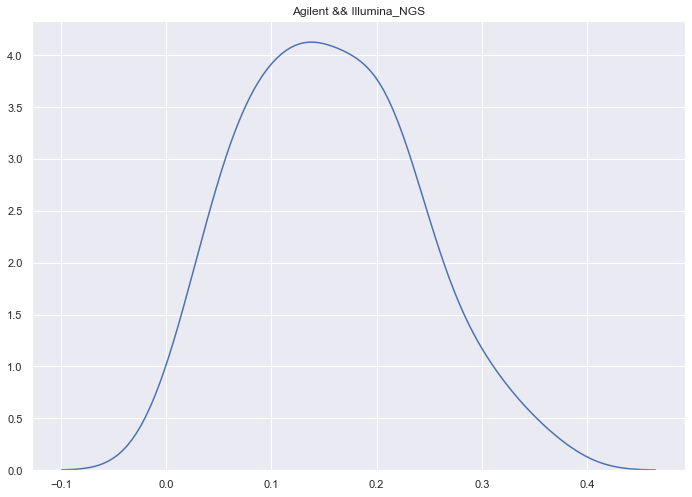

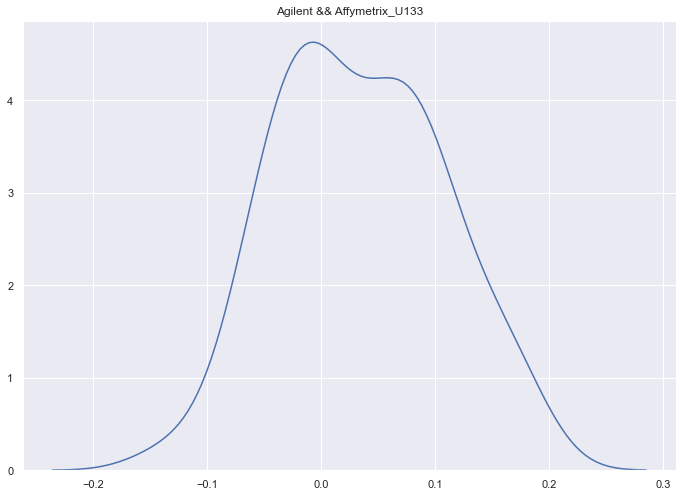

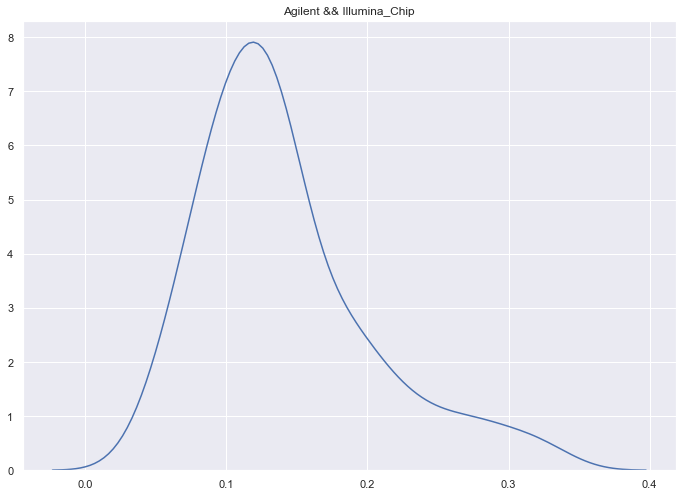

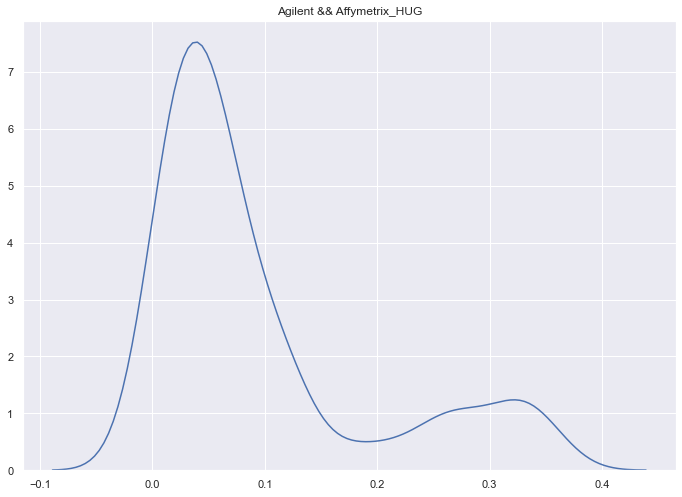

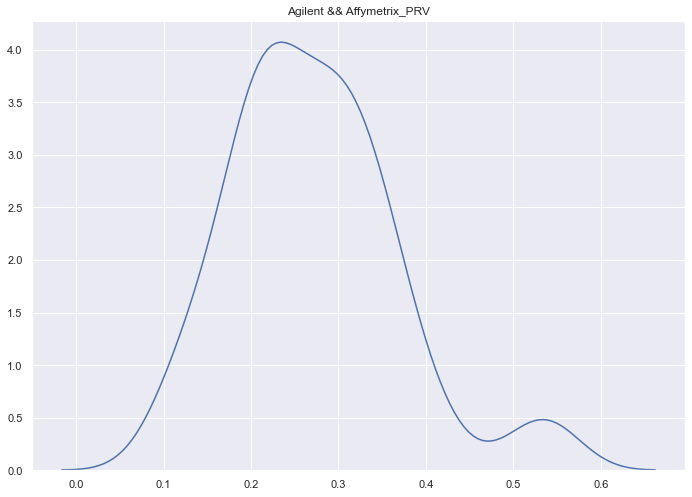

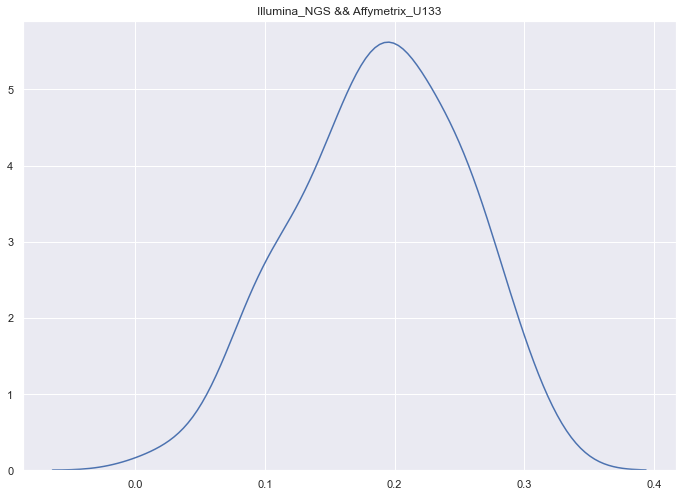

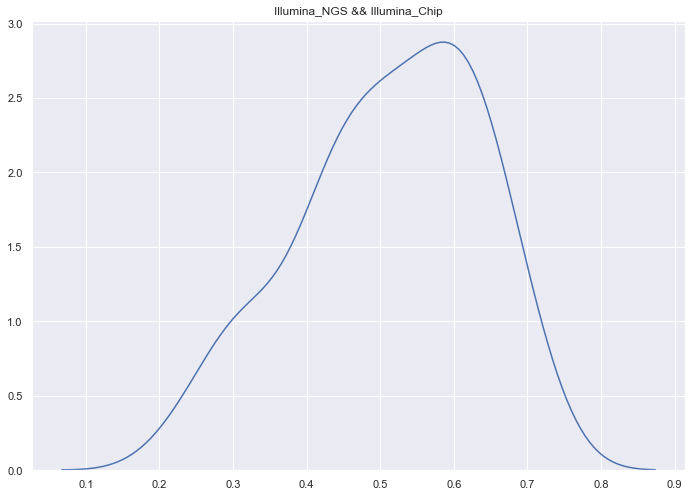

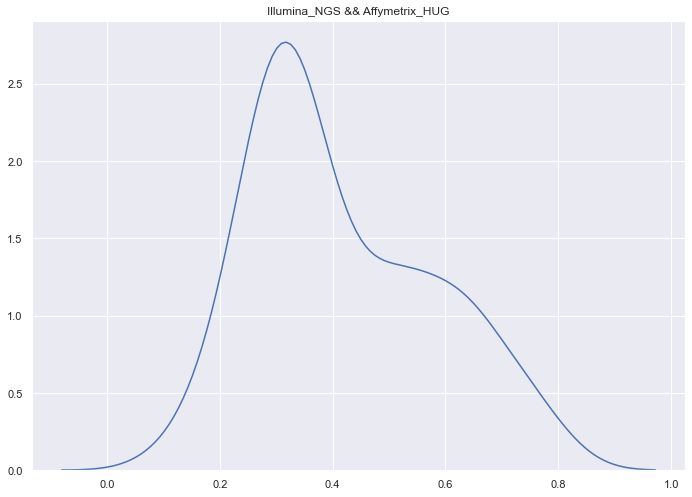

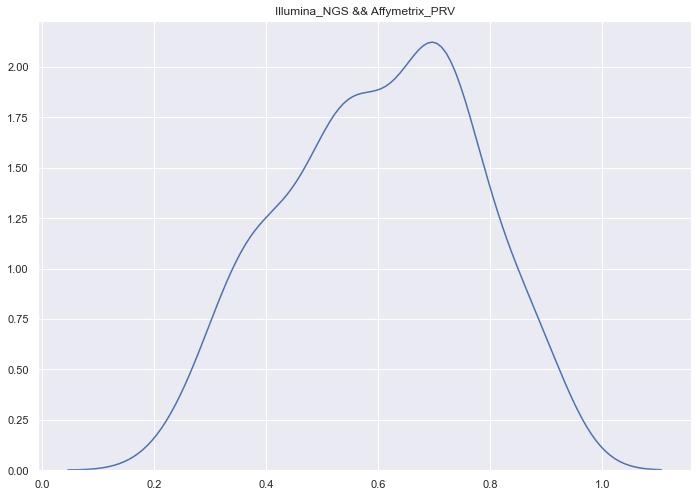

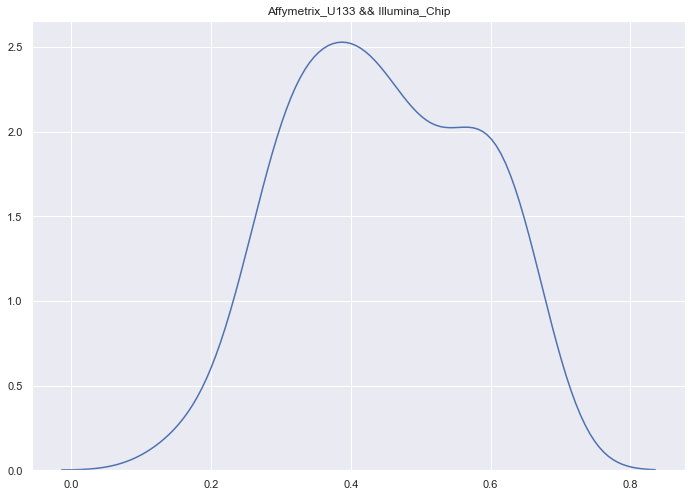

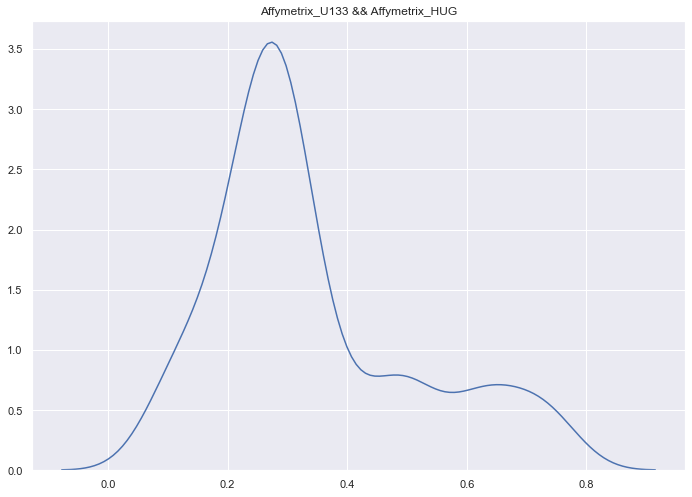

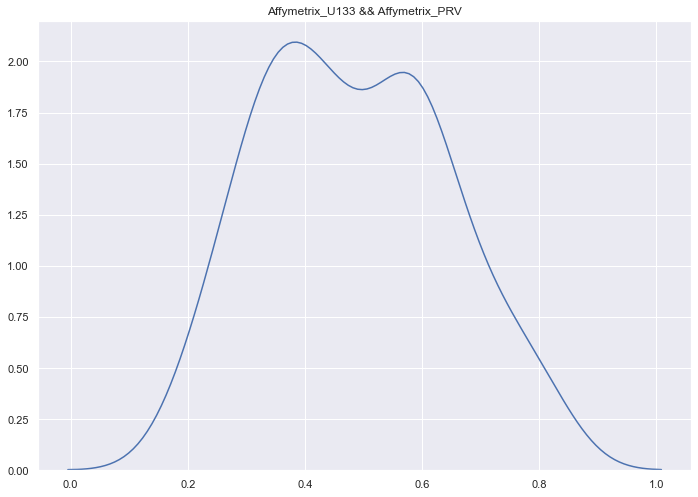

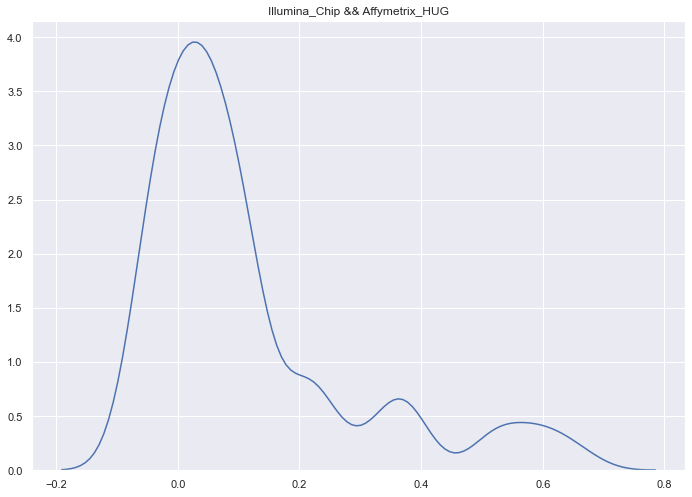

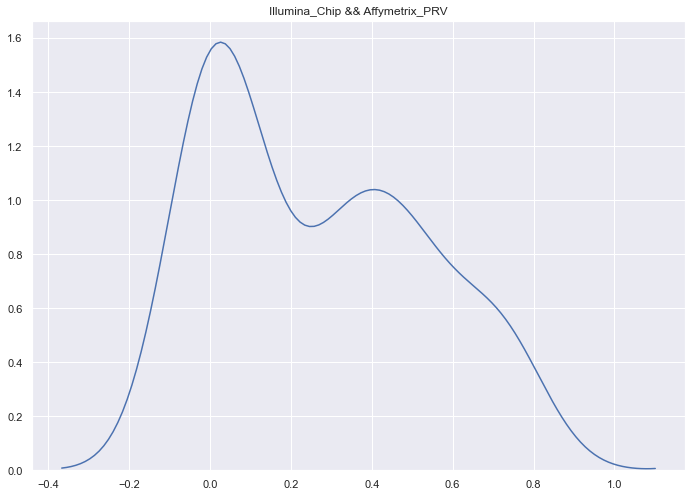

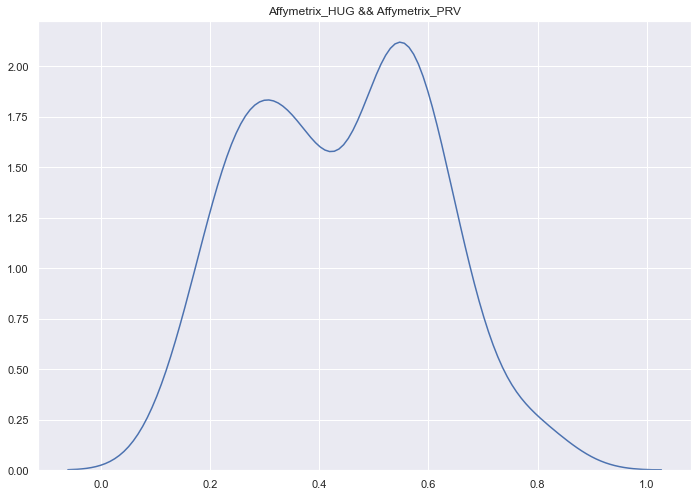

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)